In [108]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import friedmanchisquare

In [109]:
# I need to perform friedman test on all three coumns in the avg_task_completion_time.csv 
# file. I will use the friedmanchisquare function from the scipy.stats library to perform
# the test. This function will return the test statistic and the p-value. I will then
# compare the p-value to the significance level to determine if the null hypothesis can
# be rejected.
matplotlib.rcParams['font.family'] = 'Times New Roman'
# Load the data
data = pd.read_csv('round_duration.csv')

# Perform the friedman test
stat = friedmanchisquare(data['Eye_Gaze_Hands'], data['Neuro_Gaze'], data['VR_Controllers'])

print(stat)

FriedmanchisquareResult(statistic=100.15384615384619, pvalue=1.7859472896518456e-22)


FriedmanchisquareResult(statistic=100.15384615384619, pvalue=1.7859472896518456e-22)


C:\Users\ATI\AppData\Local\Temp\ipykernel_52600\326364278.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Eye Gaze + Hand Gesture', 'VR Controllers', 'NeuroGaze'], fontsize=16)  # Adjust fontsize as needed


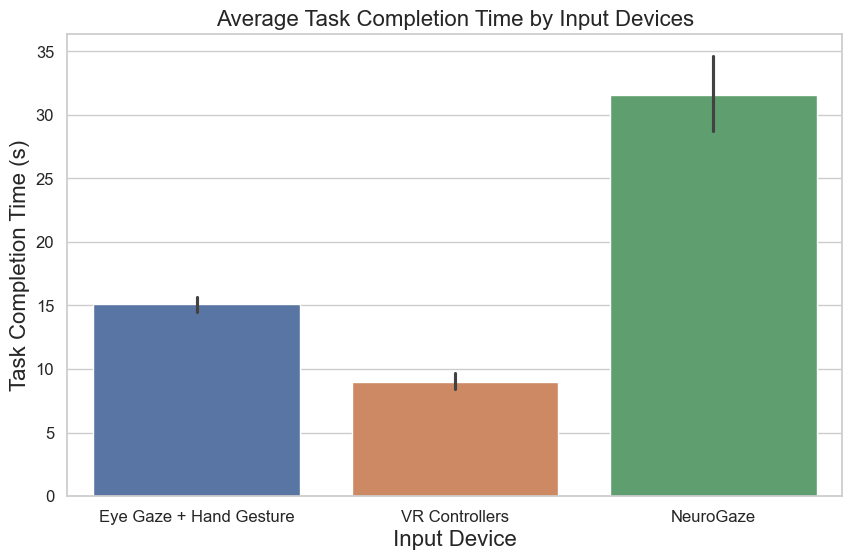

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare

# Load the data
data = pd.read_csv('round_duration.csv')

# Switch the 2nd and 3rd columns
data = data[data.columns.tolist()[0:1] + data.columns.tolist()[2:3] + data.columns.tolist()[1:2] + data.columns.tolist()[3:]]

# Save the modified dataframe to a new CSV
data.to_csv('modified_round_duration.csv', index=False)

# Perform the Friedman test on the modified data
stat = friedmanchisquare(data['Eye_Gaze_Hands'], data['Neuro_Gaze'], data['VR_Controllers'])
print(stat)

# Set the style of the plot
sns.set(style="whitegrid")

# Set font to Times New Roman
plt.rcParams.update({
    'font.size': 16,
    'font.family': 'Times New Roman'
})  # Adjust the font size and family as needed

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with error bars, adjusted for the swapped columns
ax = sns.barplot(data=data, ax=ax, errorbar=('ci',95))

# Set the x-axis labels to reflect the updated column order with specific fontsize
ax.set_xticklabels(['Eye Gaze + Hand Gesture', 'VR Controllers', 'NeuroGaze'], fontsize=16)  # Adjust fontsize as needed

# Add labels and title with specific fontsize
plt.xlabel('Input Device', fontsize=16)  # Adjust fontsize as needed
plt.ylabel('Task Completion Time (s)', fontsize=16)  # Adjust fontsize as needed
plt.title('Average Task Completion Time by Input Devices', fontsize=16)  # Adjust fontsize as needed

# Optionally, adjust tick parameters for both axes
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust labelsize as needed

# Show the plot
plt.show()


FriedmanchisquareResult(statistic=7.605263157894761, pvalue=0.022311978797129976)


C:\Users\ATI\AppData\Local\Temp\ipykernel_52600\4233076748.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Eye Gaze + Hand Gesture', 'VR Controllers', 'NeuroGaze'], fontsize=16)  # Adjust fontsize as needed


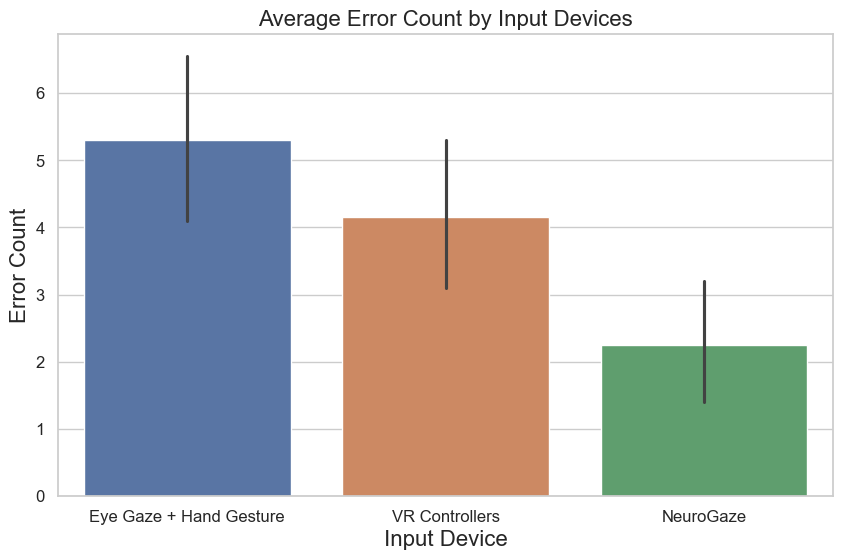

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare

# Load the data
data = pd.read_csv('gross_error_rate.csv')

# Switch the 2nd and 3rd columns
data = data[data.columns.tolist()[0:1] + data.columns.tolist()[2:3] + data.columns.tolist()[1:2] + data.columns.tolist()[3:]]

# Save the modified dataframe to a new CSV
data.to_csv('modified_gross_error_rate.csv', index=False)

# Perform the Friedman test on the modified data
stat = friedmanchisquare(data['Eye_Gaze_Hands'], data['Neuro_Gaze'], data['VR_Controllers'])
print(stat)

# Set the style of the plot
sns.set(style="whitegrid")

# Set font to Times New Roman
plt.rcParams.update({
    'font.size': 16,
    'font.family': 'Times New Roman'
})  # Adjust the font size and family as needed

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with error bars, adjusted for the swapped columns
ax = sns.barplot(data=data, ax=ax, errorbar=('ci',95))

# Set the x-axis labels to reflect the updated column order with specific fontsize
ax.set_xticklabels(['Eye Gaze + Hand Gesture', 'VR Controllers', 'NeuroGaze'], fontsize=16)  # Adjust fontsize as needed

# Add labels and title with specific fontsize
plt.xlabel('Input Device', fontsize=16)  # Adjust fontsize as needed
plt.ylabel('Error Count', fontsize=16)  # Adjust fontsize as needed
plt.title('Average Error Count by Input Devices', fontsize=16)  # Adjust fontsize as needed

# Optionally, adjust tick parameters for both axes
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust labelsize as needed

# Show the plot
plt.show()


In [112]:
from scipy.stats import wilcoxon

# Load the recently created CSV correctly
df = pd.read_csv('average_task_completion_time.csv')

# No need to skip rows or redefine columns since the CSV already has the appropriate structure

# Ensure 'Completion Time' is numeric
df['Average Completion Time'] = pd.to_numeric(df['Average Completion Time'], errors='coerce')

# Initialize a list to store each row of the final table
comparison_results = []

# Iterate through each unique Participant Number
for participant in df['Participant Number'].unique():
    # Get the rows for the same Participant Number
    participant_rows = df[df['Participant Number'] == participant]
    
    # Iterate through each unique pair of Techniques
    techniques = participant_rows['Technique being Evaluated'].unique()
    for i, technique1 in enumerate(techniques):
        for j, technique2 in enumerate(techniques):
            if technique1 == technique2 or i >= j:
                # Skip comparing a Technique with itself or repeating comparisons
                continue
            
            # Get the 'Average Completion Time' for each Technique
            scores1 = participant_rows[participant_rows['Technique being Evaluated'] == technique1]['Average Completion Time']
            scores2 = participant_rows[participant_rows['Technique being Evaluated'] == technique2]['Average Completion Time']
            
            # Perform the Wilcoxon test, ensure there are enough data points
            if len(scores1) > 0 and len(scores2) > 0:
                w, p = wilcoxon(scores1, scores2, zero_method='wilcox', correction=True)
                
                # Prepare a dictionary for the row
                row = {
                    'Participant Number': participant,
                    'Technique Comparison': f"{technique1} VS {technique2}",
                    'Statistic': w,
                    'p-Value': p
                }
                
                # Append the row to the comparison_results list
                comparison_results.append(row)

# Create a DataFrame from the comparison_results list
comparison_results_df = pd.DataFrame(comparison_results)

# Display the first few rows of the results to check
comparison_results_df.head()


,Participant Number,Technique Comparison,Statistic,p-Value
0,1,Eye_Gaze_Hands VS Neuro_Gaze,0.0,1.0
1,1,Eye_Gaze_Hands VS VR_Controllers,0.0,1.0
2,1,Neuro_Gaze VS VR_Controllers,0.0,1.0
3,10,Eye_Gaze_Hands VS Neuro_Gaze,0.0,1.0
4,10,Eye_Gaze_Hands VS VR_Controllers,0.0,1.0
